# Intuition of Data Driven Computation and Learning Algorithms

Welcome to your first lab session in CSCM21 (Abuses Bias and Blessings of Data) delivered by Dr Matt Roach, lab session has been compiled by Peter Daish (Teaching Assistant for the labs in this module). The goal of this lab is twofold. First to orient you and give you confidence in working through a lab session for this module (this lab session does not count towards your marks for this module). Second, to support the learning concepts from the lecture on intuition on key concepts of data-driven learning algorithms. In this lab you will, load some data, build a model with a data-driven algorithm. Specifically, you will train a Convolutional Neural Network to automatically classify images of dogs and cats.

## Learning objectives:

- To experience loading and viewing datasets in python. specifically a dogs-vs-cats example dataset
- To experience building and manipulating a convolutional neural network (CNN) machine learning model
- To explore the impact of increasing the amount of data used to train a model on computation and performance.
- Visualise and relate the concepts of cost function optimisation and gradient descent within a NN.
- Gain an intuition for the concept and use of manifold learning in parameter space.


Run the following cell to import libraries needed for this workbook

In [2]:
#!pip install tensorflow
import sys
import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)


#------------- Print versions an paths for potential debugging -------------------------

#print('Python version:', python_version()) # print the version of python the script is using
#print('Python path:', sys.executable) # print the path for the python executable the script is using
#print('Working Directory:', os.getcwd()) # print the current working directory 
#print ("TensorFlow version: " + tf.__version__) # print the tensorflow version

## 1. Convolutional neural network for classifying dogs and cats

In this section, we will build a data driven algorithm to guess (classifiy) wether an image contains a Cat or a Dog. Specifically we will be using a algorithm based on Deep Neural Nets called a Convolutional Neural Network (CNN), these types of algorithms are good at classifying images, though they can be applied to many types of data.


<center><img src="images/cnn_as_blackbox.png" style="width:500px;"><centre>
<caption><center> <i><b>Figure 1:</b> Using a leanring algorithm to classify Cat vs Dogs in images</i>  </center></caption>



## 1.1 Viewing and Loading the Cats-vs-Dogs dataset
    
First of all, we will need load the images of cats and dogs, on which our CNN model can be trained and tested. You have downloaded the data as part of the zip file from canvas. Take a look at the files in the folder from your unziped file, this will help you understand some of the code better, specifically the direcotry structure and images data sets. 

Tasks: 


<ol>
    <li> Display the cat.1.jpg within jupyter notebook, as a matplotlib image (this has been done for you), </li>
    <li> Display an image of a dog within jupyter notebook, as a matplotlib image </li>
    
    
</ol>


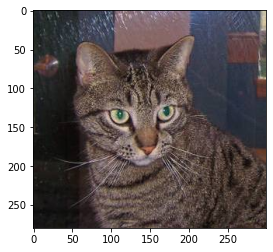

In [3]:
FILE_PATH = "./100-dogs-vs-cats/dogs-vs-cats/dogs-vs-cats/train" #

catImage = FILE_PATH + "/cat.1.jpg" # The file directory for the first image of a cat.

img = mpimg.imread(catImage) # read the image as a matplotlib image

plt.imshow(img) # chart the image


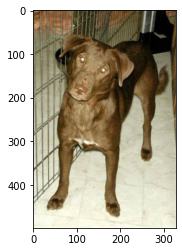

In [4]:
### START CODE ####
# Display an image of a dog using matplotlib image.

FILE_PATH = "./100-dogs-vs-cats/dogs-vs-cats/dogs-vs-cats/train" # The file path of the dog image

dogImage = FILE_PATH + "/dog.1.jpg"

img = mpimg.imread(dogImage)

plt.imshow(img)

#### END CODE ####

## 1.2 Organising and labelling the images into cats and dogs. 


The code below, will search through the cats-vs-dogs folder, creating an array of categories, to label images for training and testing of CNN. It loads the data, into a Pandas DataFrame named `df`. All you need to know about Pandas DataFrames is illustrated below in Figure 2, if you would like you can find more info on the provided links. 

<center><img src="images/finallpandas.png" style="width:500px;"></center>
<caption><center><i> <b>Figure 2:</b> Pandas DataFrame  is two-dimensional tabular data structure with labeled axes and consists of three principal components, the <font color='purple'><b>data</b></font>, <font color='orange'><b>rows</b></font>, and <font color='blue'><b>columns</b></font>.</i> </center></caption>

**Optional information** see data geeks for simple explanation and source of Figure 2 https://www.geeksforgeeks.org/python-pandas-dataframe/#. Alternatively you can visit the official Pandas DataFrame usage page https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


Conveniently, the image filenames contain their labels, so processing the images into our programme and sorting them into Cat and Dog images with lables is as simple. The code below searches through the cats-vs-dogs 'train' directory and appending each file to a list depending on the filename prefix, it also adds an addtional column with the label for that image. 

**You need to:**

- Complete the if statement below, such that images of dogs get labelled '1' in the 'categories' array, while images of cats get appended with the label '0'


In [12]:
filenames=os.listdir(FILE_PATH)
# print(filenames)


#Loop through all files, in the filenames list (listdir(FILE_PATH))
categories=[]    

for f_name in filenames:
    
    # The category of an image is the first element in the array of the filename, split by the '.' de-limiter.
    category=f_name.split('.')[0]
    
    
    ### START CODE ###
    # Dogs need to be appended to 'categories' with the value (1) while cats need to be appended with the value (0).
    if category == 'dog': 
        categories.append(1)
    else:
        categories.append(0)    
    ### END CODE ###

df=pd.DataFrame({
    
    'filename':filenames,
    'category':categories
})

print(df)

       filename  category
0    cat.20.jpg         0
1    dog.83.jpg         1
2    dog.90.jpg         1
3     cat.9.jpg         0
4    cat.15.jpg         0
..          ...       ...
195  cat.90.jpg         0
196  dog.79.jpg         1
197  dog.32.jpg         1
198  dog.73.jpg         1
199  cat.19.jpg         0

[200 rows x 2 columns]


#### Expected Results:

<center><img src="images/categories-df-100-c-vs-d.png" style="width:300px;"><centre>

**In the follwing cell your tasks are to:**


- Print the total number of images within the directory (hint: use the `len()` function),
- Print the total number of images of cats found within the directory,
- Print the total number of images of dogs found within the directory

In [13]:
### START CODE ###
# Print the total number of images within the directory: hint, use len()
numOfImg = str(len(categories))
### END CODE ###


### START CODE ###
# Print total number of cats in directory
numOfCats = 0
for x in categories:
    if x == 0:
        numOfCats += 1
### END CODE ###


### START CODE ###
# Print total number of dogs in directory
numOfDogs = 0
for x in categories:
    if x == 1:
        numOfDogs += 1
### END CODE ###


print("Number of Cats ", numOfCats)
print("Number of Dogs ", numOfDogs)
print("Total number of images = ", numOfImg)


Number of Cats  100
Number of Dogs  100
Total number of images =  200


**Expected Output**:

<table>
    <tr>
        <td>
            Total number of images
        </td>
        <td>
         200
        </td>
        <tr>
        <td>
         Number of Cats
        </td>
        <td>
         100
        </td>
            <tr>
        <td>
         Number of Dogs
        </td>
        <td>
         100
        </td>
    </tr>
</table>


Next, we shall set the image parameters as defined by the dataset we are using, so that we can pass the relevant shape of the data into our CNN model.



In [14]:
# NO NEED TO CHANGE THIS CODE
Image_Width=128 # pixel width of image.

Image_Height=128 # pixel height of image.

Image_Size=(Image_Width,Image_Height) # resolution of image.

Image_Channels=3 # number of colour channels in images.

Once we have verified that the data is being read correctly by python, we can begin to build our CNN model, using keras.



## 1.3 Assembling the CNN

In this setion we shall bulid our model. You will recall the following image from the lecture slides on "Learning Algorithms", this is model that won image net in 2014.    
<center><img src="images/CNN-architecture-VGG.png" style="width:600px;"></center>
<caption><center><i> <b>Figure 3:</b>Convultional Nural Net (CNN) archetecture, specfivally the VGG-16 model</i> </center></caption>

A remnder note on the architecture of CNNs:


- Convolution layers consist of filters that pass over the image data and amplify the most significant features within that image (remember that the values in the filters are learnt).
- Convolutional layers, by virtue of passing filters over data, have the effect of reducing the resolution of the data.
- Max pooling layers have the effect of reducing the dimensionality of image data, whilst retaining the most significant features. You can think o fthis as averagin over the image with the addtion of helping the model learn feature for a range of rolsutoion images.
- Finally the dense (fully connected) layers make the classification decision, these are classic Neural Net layers
  
Figures 2 (Convolutional), and 3 (pooling) illustrate how the layers work.
    
<center><img src="images/convolutionalfilter.gif" style="width:500px;"></center>
<caption><center><i> <b>Figure 2:</b> Convolutional feature extraction <font color='orange'><b>filter</b></font>, <font color='green'><b>oringal input values</b></font>, and <font color='blue'><b>convolved output values</b></font>.</i> </center></caption>

<center><img src="images/max-pooling.png" style="width:500px;"></center>
<caption><center><i> <b>Figure 3:</b>Max Pooling.</i> </center></caption>

Here we define our own model in the code below it is a convoltiouanl nueral Net (CNN) similar to the VGG-16 model, however here for ease of comutional (faster) we will bulid a slightly smaller model.

Run the code below to define and print the model we will use in this workbook.

In [16]:
# Do NOT Change
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 61, 61, 64)      

2022-02-21 00:26:36.777642: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 51380224 exceeds 10% of free system memory.
2022-02-21 00:26:36.793265: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 51380224 exceeds 10% of free system memory.


## 1.4   Preparing the data for use in training the model.


As we begin to train our model, the images of cats and dogs get formatted to the correct shape (128x128x3) and then inputted into our CNN model. Once the image has been selected, it must pass through all of the different layers within the underlying neural network, such that the model can learn the correct weights attributed to the image.

<center><img src="images/cat-dog-flow-vertical.gif" style="width:500px;"></center>
<caption><center><i> <b>Figure 4:</b>Forward pass, after training NN</i> </center></caption>

After weights have been trained, features within the images activate the same or very similar neural pathways as the ones trained by the training data, such that the model can give the impression of having learnt how to discriminate between classes.



### 1.4.1 Configuring the data for highest accuracy possible

The code below is dedicated to manipulating the image data, such that it can train the CNN to be robust in its classification of cats and dogs. The model will manipulate images, by rotating, zooming, flipping axis and resizing images, so that the model does not get used to classifying only certain perspectives of images of cats and dogs. There is no need to change the code written below. For now, just gain the intuition that a cat rotated by 15 degrees, for example, may not look like a cat to a CNN without considering the possibility of 'rotation' in the training dataset.

Run the code below to achieve the above.


In [17]:
from datagen import gen_data
validation_generator, test_generator, train_generator, total_validate, batch_size, total_train, callbacks, learning_rate_reduction, earlystop = gen_data(df, model, FILE_PATH, Image_Size)

Found 160 validated image filenames belonging to 2 classes.
Found 40 validated image filenames belonging to 2 classes.
Found 160 validated image filenames belonging to 2 classes.


## 1.4 Training the model

Below, we will train the model we have constructed. The model is being trained on 80% of the dogs-vs-cats dataset and tested on 20%. You will recall from the lecture slides, that deep learning models learn through gradient descent as a means of optimising their cost function.



XXXXXXX GRADiaent DECENT





<center><img src="images/sgd.gif" style="width:350px;"></center>
<caption><center><i> <b>Figure 4:</b>Visulisation of Gradent decent and parameters are updated the cost function reduces</i> </center></caption>

Run the code below to train the model note that each epoch represent one full training cyle on the entrei data set. In this case we train for 10 epochs. 

In [18]:
# Press to run
epochs=10
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10
10/10 [==============================] - 11s 852ms/step - loss: 2.5038 - accuracy: 0.5125 - val_loss: 0.7649 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 2/10
10/10 [==============================] - 6s 499ms/step - loss: 1.2250 - accuracy: 0.5750 - val_loss: 2.1136 - val_accuracy: 0.4062 - lr: 0.0010
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 1.1503 - accuracy: 0.6062
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
10/10 [==============================] - 4s 383ms/step - loss: 1.1503 - accuracy: 0.6062 - val_loss: 3.6369 - val_accuracy: 0.3438 - lr: 0.0010
Epoch 4/10
10/10 [==============================] - 4s 403ms/step - loss: 1.2145 - accuracy: 0.6250 - val_loss: 2.4848 - val_accuracy: 0.3438 - lr: 5.0000e-04
Epoch 5/10
10/10 [==============================] - ETA: 0s - loss: 0.8102 - accuracy: 0.6750
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
10/10 [==============================] - 4s 38

### 1.3 CNN Model analytics

Now that our CNN model has been trained, lets visualise the process it went through when attempting to learn the essence of dogs and cats, within the pictures.

**In this section, your task is to:**
<ol>
    <li> Plot accuracy against loss, </li>
</ol>

In [20]:
def plot_result(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.title('Training accuracy')
    plt.legend()
    plt.grid()
    plt.figure()

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.title('Training loss')
    plt.legend()
    plt.grid()
    plt.show()
    
    ### START CODE ###
    # Task 1: plot accuracy vs loss
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.title('Accuracy vs Loss')
    plt.legend()
    plt.grid()
    plt.show
    ### END CODE ###

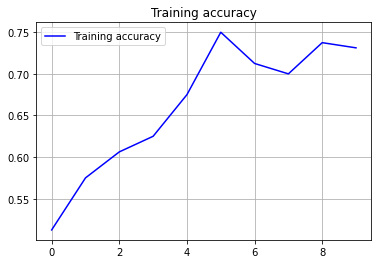

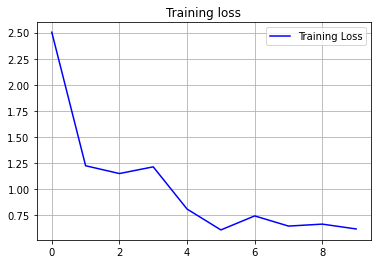

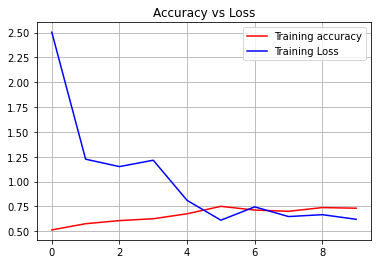

In [21]:
plot_result(history)

**Expected Output**:

<table>
    <tr>
        <td>
            Training accuracy
        </td>
        <td>
         <center><img src="images/training-validation-accuracy.png" style="width:250px;"></center>
        </td>
        <tr>
        <td>
         Training loss
        </td>
        <td>
         <center><img src="images/training-validation-loss.png" style="width:250px;"></center>
        </td>
            <tr>
        <td>
         Accuracy vs loss
        </td>
        <td>
         <center><img src="images/accuracy-loss.png" style="width:250px;"></center>
        </td>
    </tr>
</table>


### 1.4 Visualisation of CNN features

<center><img src="images/feature-extraction.png" style="width:500px;"></center>
<caption><center><i> <b>Figure 4:</b>Vizulising feasture in various layers of the network</i> </center></caption>

Now that we've seen the process our model is using to improve accuracy, let's have a look at what the CNN model is doing to our data, under the hood.

You will recall the image above from the lecture slides, as a visualisation of the 'features' which neural networks 'learn'.


Tasks:
   <ol>
    <li>Run the programme below: can you see any similarities between the features of this CNN and the one from the lecture slide?</li>
    </ol>

conv2d_3 32
Shape of weight matrix : (3, 3, 3, 32)
Shape of bias matrix : (32,)
Minimum of weight : -0.141271710395813
Maximum of weight : 0.14912214875221252
Minimum of weight : 0.0
Maximum of weight : 1.0
Number of filters : 32


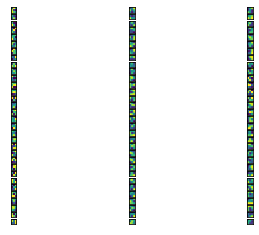

conv2d_4 64
Shape of weight matrix : (3, 3, 32, 64)
Shape of bias matrix : (64,)
Minimum of weight : -0.09831587225198746
Maximum of weight : 0.09873788803815842
Minimum of weight : 0.0
Maximum of weight : 1.0
Number of filters : 64


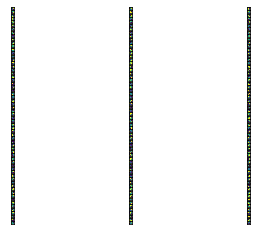

conv2d_5 128
Shape of weight matrix : (3, 3, 64, 128)
Shape of bias matrix : (128,)
Minimum of weight : -0.07614069432020187
Maximum of weight : 0.07901711016893387
Minimum of weight : 0.0
Maximum of weight : 1.0
Number of filters : 128


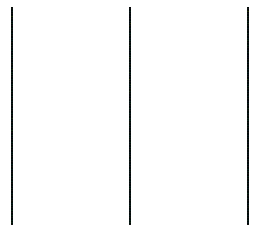

In [22]:
#Iterate through  all the layers of the model
#https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, layer.filters)
        print(f'Shape of weight matrix : {weights.shape}')
        print(f'Shape of bias matrix : {bias.shape}')
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        print(f'Minimum of weight : {f_min}')
        print(f'Maximum of weight : {f_max}')
        filters = (weights - f_min) / (f_max - f_min)  
        f_min, f_max = filters.min(), filters.max()
        print(f'Minimum of weight : {f_min}')
        print(f'Maximum of weight : {f_max}')
        print(f'Number of filters : {filters.shape[3]}')
        
        number_of_filters = filters.shape[3]
        number_of_channels = filters.shape[2]
        filter_cnt=1
        
        #plotting all the filters
        for i in range(number_of_filters):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(number_of_filters, filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

conv2d_3 32
Shape of weight matrix : (3, 3, 3, 32)
Shape of bias matrix : (32,)
Minimum of weight : -0.141271710395813
Maximum of weight : 0.14912214875221252
Minimum of weight : 0.0
Maximum of weight : 1.0
Number of filters : 32


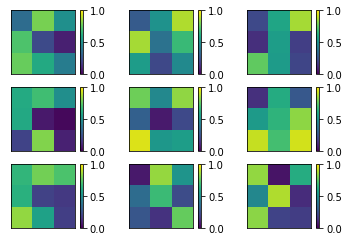

conv2d_4 64
Shape of weight matrix : (3, 3, 32, 64)
Shape of bias matrix : (64,)
Minimum of weight : -0.09831587225198746
Maximum of weight : 0.09873788803815842
Minimum of weight : 0.0
Maximum of weight : 1.0
Number of filters : 64


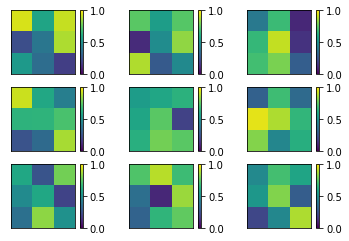

conv2d_5 128
Shape of weight matrix : (3, 3, 64, 128)
Shape of bias matrix : (128,)
Minimum of weight : -0.07614069432020187
Maximum of weight : 0.07901711016893387
Minimum of weight : 0.0
Maximum of weight : 1.0
Number of filters : 128


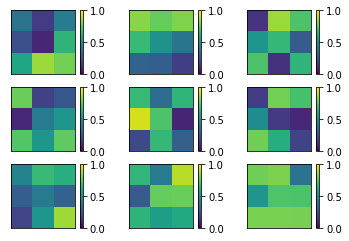

In [23]:
#Iterate through  all the layers of the model
#https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, layer.filters)
        print(f'Shape of weight matrix : {weights.shape}')
        print(f'Shape of bias matrix : {bias.shape}')
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        print(f'Minimum of weight : {f_min}')
        print(f'Maximum of weight : {f_max}')
        filters = (weights - f_min) / (f_max - f_min)  
        f_min, f_max = filters.min(), filters.max()
        print(f'Minimum of weight : {f_min}')
        print(f'Maximum of weight : {f_max}')
        print(f'Number of filters : {filters.shape[3]}')
        
        
        # Plot 3 filters with 3 channels
        filter_cnt=1
        number_of_filters = 3
        number_of_channels = 3
        
        #plotting 3 filters : Each row corresponds to a filter
        for i in range(number_of_filters):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting first 3 channels of each filters : Each column corresponds to a channel
            for j in range(number_of_channels):
                ax= plt.subplot(number_of_filters, number_of_channels, filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j], vmin = 0, vmax = 1)
                plt.colorbar()
                filter_cnt+=1
        plt.show()

### 1.5 Dogs VS Cats, 300 images:

In this section, we will explore the effect of training the neural network on more data. In the first example, the dataset contained 100 images of cats and dogs, but in this example we will increase that to 300 images of cats and dogs, respectively.



#### Load in the dataset - 300 Cats-VS-Dogs

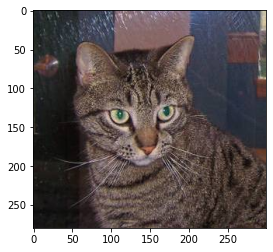

In [24]:
FILE_PATH = "./300-dogs-vs-cats/dogs-vs-cats/dogs-vs-cats/train" #


### Start Task 1 ###

catImage = FILE_PATH + "/cat.1.jpg" # The file directory for the first image of a cat.

img = mpimg.imread(catImage) # read the image as a matplotlib image

plt.imshow(img) # chart the image

### End Task 1 ###

#### Categorise the images in a dataframe

In [25]:
filenames=os.listdir(FILE_PATH)


#Loop through all files, in the filenames list (listdir(FILE_PATH))
categories=[]    

for f_name in filenames:
    
    # The category of an image is the first element in the array of the filename, split by the '.' de-limiter.
    category=f_name.split('.')[0]
    
    
    ### START CODE ###
    # Dogs need to be appended to 'categories' with the value (1) while cats need to be appended with the value (0).
    if(category == 'dog') :
        categories.append(1)
    else :
        categories.append(0)
    ### END CODE ###

df=pd.DataFrame({
    
    'filename':filenames,
    'category':categories
})

print(df)

        filename  category
0    cat.269.jpg         0
1     cat.20.jpg         0
2    dog.222.jpg         1
3    cat.202.jpg         0
4    cat.179.jpg         0
..           ...       ...
595   cat.19.jpg         0
596  cat.188.jpg         0
597  dog.109.jpg         1
598  cat.290.jpg         0
599  dog.103.jpg         1

[600 rows x 2 columns]


#### Model Architecture

In [26]:
# Do NOT Change
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 61, 61, 64)      

#### Generate varied representations of images for better generalisation

In [28]:
from datagen import gen_data
validation_generator, test_generator, train_generator, total_validate, batch_size, total_train, callbacks, learning_rate_reduction, earlystop = gen_data(df, model, FILE_PATH, Image_Size)

Found 480 validated image filenames belonging to 2 classes.
Found 120 validated image filenames belonging to 2 classes.
Found 480 validated image filenames belonging to 2 classes.


#### Run the model on 300 images of cats and dogs

In [29]:
# Press to run
epochs=10
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10
30/30 [==============================] - 16s 483ms/step - loss: 1.7787 - accuracy: 0.5208 - val_loss: 0.9756 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
30/30 [==============================] - 12s 405ms/step - loss: 1.1336 - accuracy: 0.5479 - val_loss: 0.7301 - val_accuracy: 0.5446 - lr: 0.0010
Epoch 3/10
30/30 [==============================] - 12s 395ms/step - loss: 1.0886 - accuracy: 0.5813 - val_loss: 0.9402 - val_accuracy: 0.4554 - lr: 0.0010
Epoch 4/10
30/30 [==============================] - 12s 391ms/step - loss: 0.9721 - accuracy: 0.6000 - val_loss: 0.7947 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 5/10
30/30 [==============================] - 12s 394ms/step - loss: 0.8899 - accuracy: 0.6083 - val_loss: 1.1114 - val_accuracy: 0.5357 - lr: 0.0010
Epoch 6/10
30/30 [==============================] - 12s 401ms/step - loss: 0.7812 - accuracy: 0.6375 - val_loss: 0.7400 - val_accuracy: 0.6161 - lr: 0.0010
Epoch 7/10
30/30 [==============================] - 12s 385ms/st

#### Plot accuracy and loss of new model

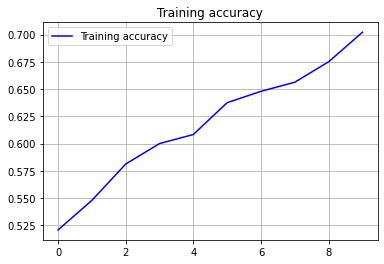

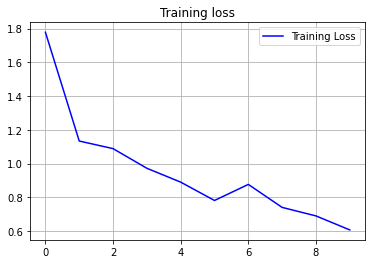

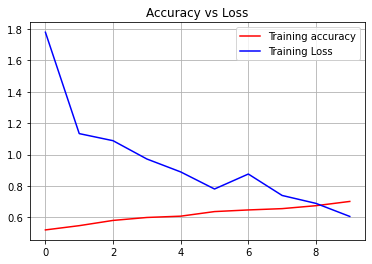

In [30]:
### START CODE ###
# Hint, use function from above.
plot_result(history)
### END CODE ###


### 1.5 Dogs VS Cats, 6000 images:

In this section, we will explore the effect of training the neural network on more data. In the first example, the dataset contained 100 images of cats and dogs, but in this example we will increase that to 5000 images of cats and dogs, respectively.



#### Load in the dataset - 6000 Cats-VS-Dogs

In [75]:
FILE_PATH = "./dogs-vs-cats/dogs-vs-cats/train" #


### Start Task 1 ###

catImage = FILE_PATH + "/cat.1.jpg" # The file directory for the first image of a cat.

img = mpimg.imread(catImage) # read the image as a matplotlib image

plt.imshow(img) # chart the image

### End Task 1 ###

FileNotFoundError: [Errno 2] No such file or directory: './dogs-vs-cats/dogs-vs-cats/train/cat.1.jpg'

#### Categorise the images in a dataframe

In [ ]:
filenames=os.listdir(FILE_PATH)


#Loop through all files, in the filenames list (listdir(FILE_PATH))
categories=[]    

for f_name in filenames:
    
    # The category of an image is the first element in the array of the filename, split by the '.' de-limiter.
    category=f_name.split('.')[0]
    
    
    ### START CODE ###
    # Dogs need to be appended to 'categories' with the value (1) while cats need to be appended with the value (0).
    if category == 'dog': 
        categories.append(1)
    else:
        categories.append(0)    
    ### END CODE ###

df=pd.DataFrame({
    
    'filename':filenames,
    'category':categories
})

print(df)

#### Model Architecture

In [ ]:
# Do NOT Change
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

model.summary()

#### Generate varied representations of images for better generalisation

In [ ]:
from datagen import gen_data
validation_generator, test_generator, train_generator, total_validate, batch_size, total_train, callbacks, learning_rate_reduction, earlystop = gen_data(df, model, FILE_PATH, Image_Size)

#### Run the model on 6000 images of cats and dogs

In [ ]:
# Press to run
epochs=10
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

#### Plot accuracy and loss of new model

In [ ]:
def plot_result(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, acc, 'r', label = 'Accuracy')
    plt.title('Accuracy vs Loss')
    plt.legend()
    plt.show
    
plot_result(history)

model.save('./6000-model')

# 2. An Introduction to Manifold Learning through t-SNE:

<center><img src="images/manifold-learning-lecture.png" style="width:300px;"></center>
<caption><center><i> <b>Figure 4:</b>Manifold leanring and Visulisation example</i> </center></caption>


Manifold learning is a concept that decribes the actions of non-linear machine-learning technique shaping and worping a feature space to that it maximiase the chances of discrimantion between classes. Here we will use a technique call dimention reduction so that we can visulise (in low dimentions, two) a process of manifold leanring.

High-dimensional data can often be difficult to separate in a linear fashion. Such data is often described as non-linearly separable, suggesting that the data are too closely intertwined with one another that it would be impossible to draw a straight line of separation between classes.

<center><img src="images/linear-nonlinear-separation.png" style="width:500px;"></center>
<caption><center><i> <b>Figure 4:</b>a visualisation of the terms: linearly separable and non-linearly separable</i> </center></caption>


Typically, data used for machine learning are of a particularly high dimensionality and not commonly linearly separable. The dimension space for deep-learning problems can run from 2-dimensions (2D) through to hundreds, thousands or milions of dimensions.

High-dimensional data can be tricky to work with (how does one visulize a 32-dimensional feature space?). As such, technqiues have been developed to attempt to reduce the dimemensionality of a dataset, whilst retaining within-class relationships and emphasising between-class separability.

One such method of conducting this, is through the use of t-SNE (or t-distributed stochastic neighbour embedding), which can transform high-dimensional, non-linearly separable datasets into linearly separable datasets, by calculating similarities in the data and projecting it onto a lower-dimensional subspace, for linear separation.



Notes on T-SNE:
https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a [7].


### T-SNE at work on a 3D 'S-Curve' dataset.

By using t-SNE, we can transform this 3-dimensional dataset into a linearly separable 2-dimensional dataset.


<center><img src="images/3d-scurve.png" style="width:300px;"></center>
<caption><center><i> <b>Figure 4:</b>Data before t-SNE dimensionality reduction</i> </center></caption>


<center><img src="images/2d-scurve.png" style="width:150px;"></center>
<caption><center><i> <b>Figure 4:</b>Data after t-SNE dimensionality reduction</i> </center></caption>


(image from: https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py )

#### Have a go at visulising the dimensionality reduction of a non-linearly separable data through t-SNEs

Follow this link for an interactive web-demo of t-SNE at work on some non-linearly separable problems and have a read of the description of t-SNEs therein to gain an intuition of what's going on under the hood:

https://distill.pub/2016/misread-tsne/ [4] 

### 2.1 Visulise the Digits dataset, using a t-SNE learnt representation

From here, we will now visulise our own dataset (the sk-learn 'digits' dataset) to see how t-SNE manages to separate our data into linearly separable subspaces.


<center><img src="images/digits-dataset.png" style="width:150px;"></center>
<caption><center><i> <b>Figure 4:</b>Data after t-SNE dimensionality reduction</i> </center></caption>

First, we need to import the relevant libraries and load in the digits dataset.

The sk-Learn digits dataset comprises of 10 classes of (digital) handwritten digits, ranging from 0-9.

Task 1:
- Print out the shape of the digits dataset, named `digits` 
- Display an example of how two separate digits look, within the dataset. 

In [40]:
#https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/ [6]

# RUN THIS CODE

from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
 
    
    #DO NOT CHANGE THIS CODE
def run_tsne(l_r):
    n_components = 2
    learning_rate = (l_r)
    tsne = TSNE(n_components, learning_rate = l_r)
    tsne_result = tsne.fit_transform(X)
    tsne_result.shape
    tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
    fig, ax = plt.subplots(1)
    sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120).set(title=('Learning rate at: ' + str(l_r)))
    lim = (tsne_result.min()-5, tsne_result.max()+5)
    ax.set_xlim(lim)
    ax.set_ylim(lim)
    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

    


In [32]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


digits = load_digits(n_class=10)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30


## Follow this link https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
## and plot show what the images within the digits dataset look like.

### START CODE ###
print(digits.data.shape)
plt.gray()
### END CODE ###

(1797, 64)


<Figure size 432x288 with 0 Axes>

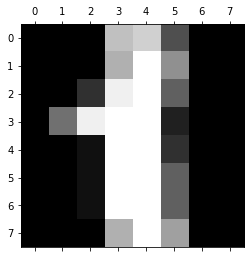

In [33]:
### START CODE ###
plt.matshow(digits.images[1])
plt.show()
### END CODE ###

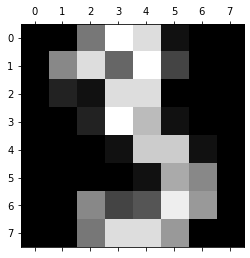

In [34]:
### START CODE ###
plt.matshow(digits.images[3])
plt.show()
### END CODE ###

Now that we have visulised how our data looks, lets see how all the data is projected onto a 2D space through a t-SNE.

Task:
<ol>
    <li> Set "learning-rate" to 0 in the code below and run the programme,</li>
    <li> What observations can you make from this?</li>
    <li> Set "learning-rate" to 2, run again - are there any changes?</li>
    <li> Set "learning-rate to 7, run again.</li>
    
</ol>

Run the code below:

/home/deshan/Documents/Education/MSC/University/Academic/Python/jupyter-notebook/jupyter-env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


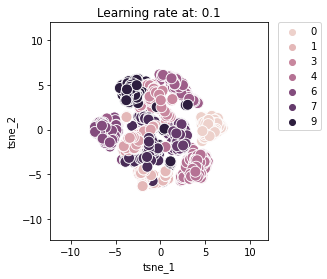

In [44]:

learning_rate = 0.1

run_tsne(learning_rate)

Run the t-SNE at two various learning rates in the code boxes below:

/home/deshan/Documents/Education/MSC/University/Academic/Python/jupyter-notebook/jupyter-env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


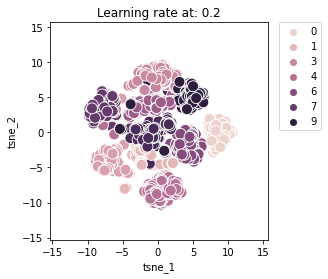

In [45]:
### Start Task ###
run_tsne(0.2)
### End Task ###

/home/deshan/Documents/Education/MSC/University/Academic/Python/jupyter-notebook/jupyter-env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


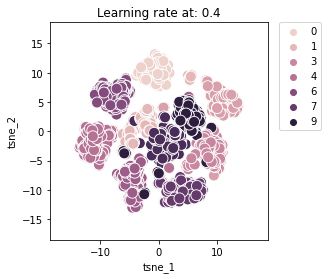

In [46]:
### Start Task ###
run_tsne(0.4)
### End Task ###

Next, set the learning rates to different levels and see how the t-SNE algorithm performs in separating this previously non-linearly separable data.

# 3. Reflections on the workbook
In this section you will refelct on the tasks in the workbook and provide answers below.

- How many samples were used in training and testing this CNN?
- What can you infer from the plot showing training accuracy and how can you relate this to training loss? 
- What can you infer from the plot showing accuracy vs loss and how can you relate this to the optimisation algorithm, stochastic gradient descent? 
- Describe how visualising the learning rates on t-SNE relate to the manipulation of parameter space in CNN learning.
- Describe how increased data impacts model performance.


## References:

[1] SciKit-Learn Manifold Learning explanation: https://scikit-learn.org/stable/modules/manifold.html

[2] SciKit-Learn Manifold learning on handwritten digits example: https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

[3] Recognizing cats and dogs with tensorflow: https://towardsdatascience.com/recognizing-cats-and-dogs-with-tensorflow-105eb56da35f

[4] Graphical demonstration of t-SNE:  https://distill.pub/2016/misread-tsne/

[5] Visuliasation of Convolutional feature map and filter visualisation: https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c

[6] Introduction to t-sne with scikit-learn: https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/

[7] t-SNE clearly explained: https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a